<a href="https://colab.research.google.com/github/Artem531/lab5cos/blob/master/%D0%A6%D0%9E%D0%A1_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Аналоговая передаточная функция

H(s)


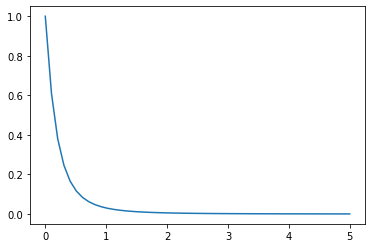

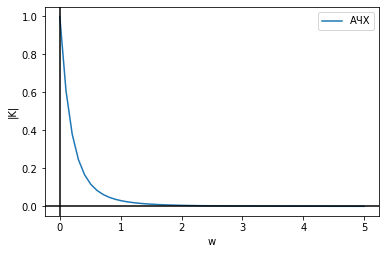

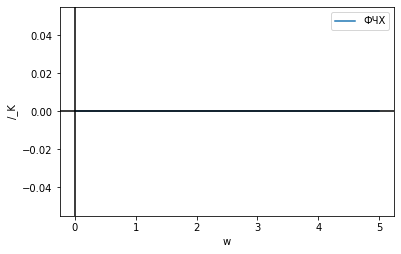

In [0]:
import numpy as np
import matplotlib.pyplot as plt


def draw(K, w_arr):
  
  # get ach
  fig = plt.figure()
  ax = fig.add_subplot(111)
  fig.subplots_adjust(top=0.85)

  line1, = plt.plot(w_arr, abs(K), label="АЧХ")
  ax.set_xlabel('w')
  ax.set_ylabel('|K|')
  # Create a legend for the first line.
  first_legend = plt.legend(handles=[line1], loc=1)
  plt.axhline(0, color='black')
  plt.axvline(0, color='black')
  plt.show()

  # get fch
  fig = plt.figure()
  ax = fig.add_subplot(111)
  fig.subplots_adjust(top=0.85)

  FCH = list(map(lambda i: np.tanh(np.imag(i)/np.real(i)), K))
  #print(FCH)
  line1, = plt.plot(w_arr, FCH, label="ФЧХ")
  ax.set_xlabel('w')
  ax.set_ylabel('/_K')
  # Create a legend for the first line.
  first_legend = plt.legend(handles=[line1], loc=1)
  plt.axhline(0, color='black')
  plt.axvline(0, color='black')
  plt.show()

def get_k(w, pole_coef, zero_coef):
  return np.sum(list(map(lambda i: w**i * zero_coef[i], range(len(zero_coef)) )) )/np.sum(list(map(lambda i: w**i * pole_coef[i], range(len(pole_coef)) ) )   ) 

def draw_ach_fch(min_f, max_f, step_f, pole_coef, zero_coef):
  K = []
  w_arr = np.linspace(min_f, max_f, (max_f - min_f)/step_f)
  for w in w_arr:
    #print(w)
    K.append(get_k(w, pole_coef, zero_coef))

  print("H(s)")
  K = np.array(K)
  plt.plot(w_arr, K)
  #print(K)
  draw(K, w_arr)
  



pole_coef = np.array([1, 4.914, 12.074, 14.832])
zero_coef = np.array([1])

draw_ach_fch(0, 5, 0.1, pole_coef, zero_coef)




Дискетная передаточная функция с билинейным z-преобразованием from H(s)

Draw H(z)


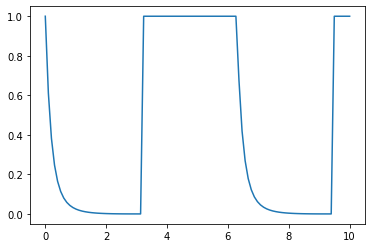

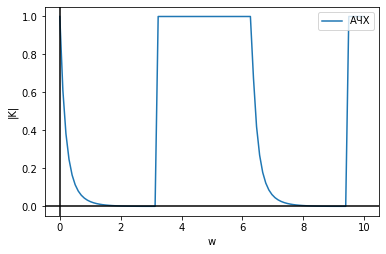

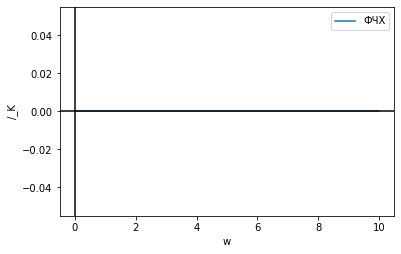

In [0]:
def get_Hs(w, pole_coef, zero_coef):
  return np.sum(list(map(lambda i: w**(i) * zero_coef[i], range(len(zero_coef)) )) )/np.sum(list(map(lambda i: w**(i) * pole_coef[i], range(len(pole_coef)) ) )   ) 


def draw_Hz(min_f, max_f, step_f, Td,  pole_coef, zero_coef):
  K = []
  z_arr = []
  w_arr = np.linspace(min_f, max_f, (max_f - min_f)/step_f)
  for w in w_arr:
    #print(w)
    # ------important init big W----------
    # set negativ W = 0 because negativ W it's no sense
    W = 2/Td * np.tan(w * Td / 2) if 2/Td * np.tan(w * Td / 2) > 0 else 0

    # ----------------

    K.append(get_Hs(W, pole_coef, zero_coef))
  
  K = np.array(K)
  z_arr = np.array(z_arr)
  plt.plot(w_arr, K)
  draw(K, w_arr)
  return K, w_arr




pole_coef = np.array([1, 4.914, 12.074, 14.832])
zero_coef = np.array([1])

print("Draw H(z)")
_, _ = draw_Hz(0, 10, 0.1, 1, pole_coef, zero_coef)

работа фильтра при обработке гармонического сигнала, представленного в цифровой форме

In [0]:
from itertools import combinations  as comb 
# Get all permutations of length 2 
# and length 2 
perm = comb([1, 2, 3], 2) 
  
# Print the obtained permutations 
for i in list(perm): 
    print (i)


(1, 2)
(1, 3)
(2, 3)


In [0]:
def get_coef(roots):
  result = [1]
  #print(roots)
  for i in  range(1, len(roots)): 
    combinations = list(comb(roots, i))
    #print("combinations", combinations)
    product = np.prod(combinations, axis = 1)
    #print("product", product)
    summa =  np.sum(product)
    result.append(summa * (-1)**i)
  result.append(np.prod(-np.array(roots) ))
  #print(roots)
  return result

# (x - 2)(x - 1) = x^2 - 3x + 2
print(get_coef([1, 1, 1]), 2)


[1, -3, 3, -1] 2


In [0]:
def biCoef(pow1, val_a, N):
  zerosUp = [-1 for i in range(pow1)]
  zerosUp += [1 for i in range(N - pow1)]
  print("zerosUp", zerosUp)
  print("len ", len(zerosUp))
  coefUp = get_coef(zerosUp)
  #print(coefUp)
  return np.array(coefUp) * val_a

def get_coefUp_Down(a_array):
  # pow from low to high
  N = len(a_array) - 1
  save_coef = []
  last_down = []
  for i in range(len(a_array)):
    coefDown = biCoef(i, a_array[i], N)
    print("coefDown", coefDown)
    save_coef.append(coefDown)
  save_coef = np.array(save_coef)
  coefUp = get_coef([-1 for i in range(N)])
  coefDown = np.sum(save_coef, 0)
  return coefDown, np.array(coefUp).astype(np.float64) 


print("pole coef", list(reversed(pole_coef)))
print(get_coefUp_Down(list(reversed(pole_coef))))


pole coef [14.832, 12.074, 4.914, 1.0]
zerosUp [1, 1, 1]
len  3
coefDown [ 14.832 -44.496  44.496 -14.832]
zerosUp [-1, 1, 1]
len  3
coefDown [ 12.074 -12.074 -12.074  12.074]
zerosUp [-1, -1, 1]
len  3
coefDown [ 4.914  4.914 -4.914 -4.914]
zerosUp [-1, -1, -1]
len  3
coefDown [1. 3. 3. 1.]
(array([ 32.82 , -48.656,  30.508,  -6.672]), array([1., 3., 3., 1.]))


In [0]:
def canon_filter(X, a, b):
  result = []
  result.append(X[0] * b[0])

  val_add_array = [X[0]]

  for i in range(1, len(X)):
    val = X[i]
    
    val += np.sum(val_add_array[i - 1] * a[1:] * (-1))
    val_add_array.append(val)

    val += np.sum(val_add_array[i - 2] * b[1:]) + val * b[0]
    result.append(val)
  return result

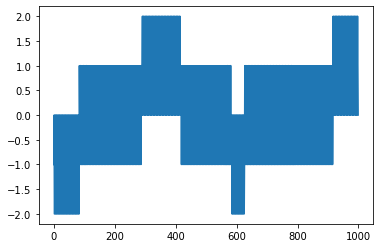

ach fch - ref signal


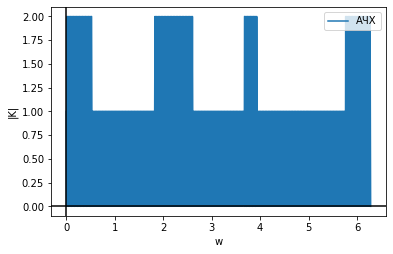

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in double_scalars


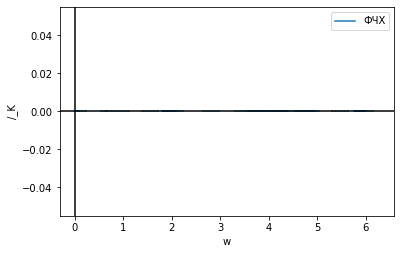

pole coef [14.832, 12.074, 4.914, 1.0]
zerosUp [1, 1, 1]
len  3
coefDown [ 14.832 -44.496  44.496 -14.832]
zerosUp [-1, 1, 1]
len  3
coefDown [ 12.074 -12.074 -12.074  12.074]
zerosUp [-1, -1, 1]
len  3
coefDown [ 4.914  4.914 -4.914 -4.914]
zerosUp [-1, -1, -1]
len  3
coefDown [1. 3. 3. 1.]
[ 1.         -1.48251066  0.92955515 -0.20329068] [1. 3. 3. 1.]


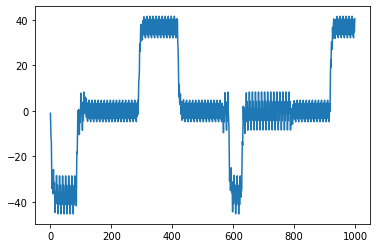

ach fch - after filter signal


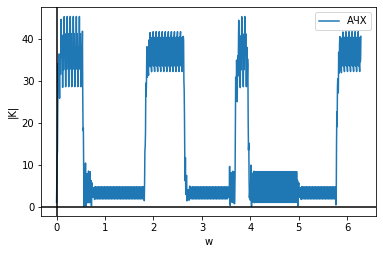

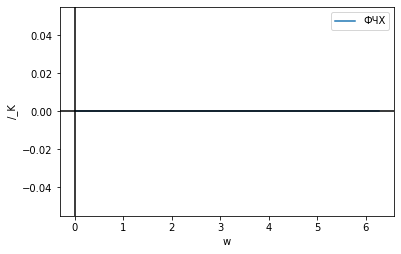

In [0]:
signal = np.array(list(map(lambda val: round(val), np.sin((np.linspace(0, 2*3.14, 1000))))))
signal += np.array(list(map(lambda val: round(val), np.sin((np.linspace(0, 2*3.14, 1000) * 300)))))
signal += np.array(list(map(lambda val: round(val), np.sin((np.linspace(0, 2*3.14, 1000) * 1000 + 30)))))


line1, = plt.plot(signal, label="ref signal")
plt.show()
print("ach fch - ref signal")
draw(np.array(signal), np.linspace(0, 2*3.14, 1000))


print("pole coef", list(reversed(pole_coef)))
c, d = get_coefUp_Down(list(reversed(pole_coef)))
c /= c[0]
d /= c[0]
print(c, d)
# calculated param of filter from a, b above
#c = [1, -1.483, 0.9296, -0.2033]
#d = [0.03047, 0.0914, 0.0914, 0.03047]

plt.plot(canon_filter(signal,  np.array(c), np.array(d) ), label="after filter signal" )
plt.show()
print("ach fch - after filter signal")
draw(np.array(canon_filter(signal,  np.array(c), np.array(d))), np.linspace(0, 2*3.14, 1000))


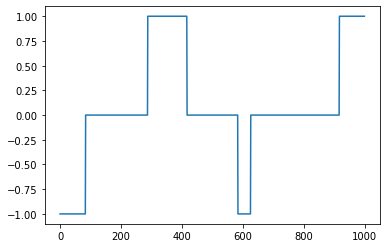

ach fch - ref signal


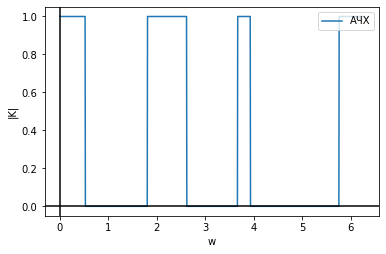

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in double_scalars


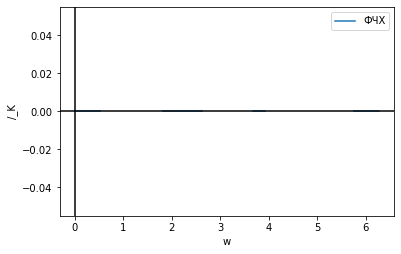

In [0]:
signal = np.array(list(map(lambda val: round(val), np.sin((np.linspace(0, 2*3.14, 1000))))))
#signal += np.array(list(map(lambda val: round(val), np.sin((np.linspace(0, 2*3.14, 1000) * 300)))))
signal += np.array(list(map(lambda val: round(val), np.sin((np.linspace(0, 2*3.14, 1000) * 1000 + 30)))))


line1, = plt.plot(signal, label="ref signal")
plt.show()
print("ach fch - ref signal")
draw(np.array(signal), np.linspace(0, 2*3.14, 1000))